In [1]:
import osnap
import matplotlib.pyplot as plt
import seaborn as sns
import osmnx as ox
import sys, os

sns.set_context('notebook')

import warnings
warnings.filterwarnings("ignore")

In [2]:
columbus = osnap.data.Community(source='ltdb', name='Columbus', cbsafips=osnap.metros[osnap.metros.name.str.startswith('Columbus, OH')].geoid.values[0])

In [3]:
columbus = columbus.to_crs(ox.project_gdf(columbus.counties).crs)

## Analyze neighborhood clusters

To facilitate geodemographic and other neighborhood typologies, the `osnap.analyze` module provides the `cluster` function. 

`cluster`takes a `Community`, a list of columns/variables, a clustering algorithm, and a number of clusters. It handles temporal clustering by splitting the dataset into decades and standardizing each variable, then re-pooling all the time periods back together before running the clustering algorithm on the full set of observations. This allows the distribution of each variable to evolve over time. It also allows neighborhood variables to move through different positions in the distrbution while providing a consistent set of clusters across time periods

In [4]:
clusters = osnap.analyze.cluster(columbus, columns=['median_household_income', 'p_poverty_rate', 'p_edu_college_greater', 'p_unemployment_rate'], method='ward')

`cluster` returns a `Dataset` class with cluster labels appended as a new column on `data`. This makes it simple to visualize how the clusters have evolved in space over time

In [5]:
def plot(clusters, column):    
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(25, 10))

    clusters.plot(column=column, year=1980, ax=ax1, plot_counties=False)
    ax1.set_title('1980', fontsize=20)
    ax1.axis('off')

    clusters.plot(column=column, year=1990, ax=ax2, plot_counties=False)
    ax2.set_title('1990', fontsize=20)
    ax2.axis('off')

    clusters.plot(column=column, year=2000, ax=ax3, plot_counties=False)
    ax3.set_title('2000', fontsize=20)
    ax3.axis('off')

    clusters.plot(column=column, year=2010, ax=ax4, plot_counties=False)
    ax4.set_title('2010', fontsize=20)
    ax4.axis('off')
    
    fig.suptitle(column, fontsize=24, fontweight='bold')
    fig.tight_layout()

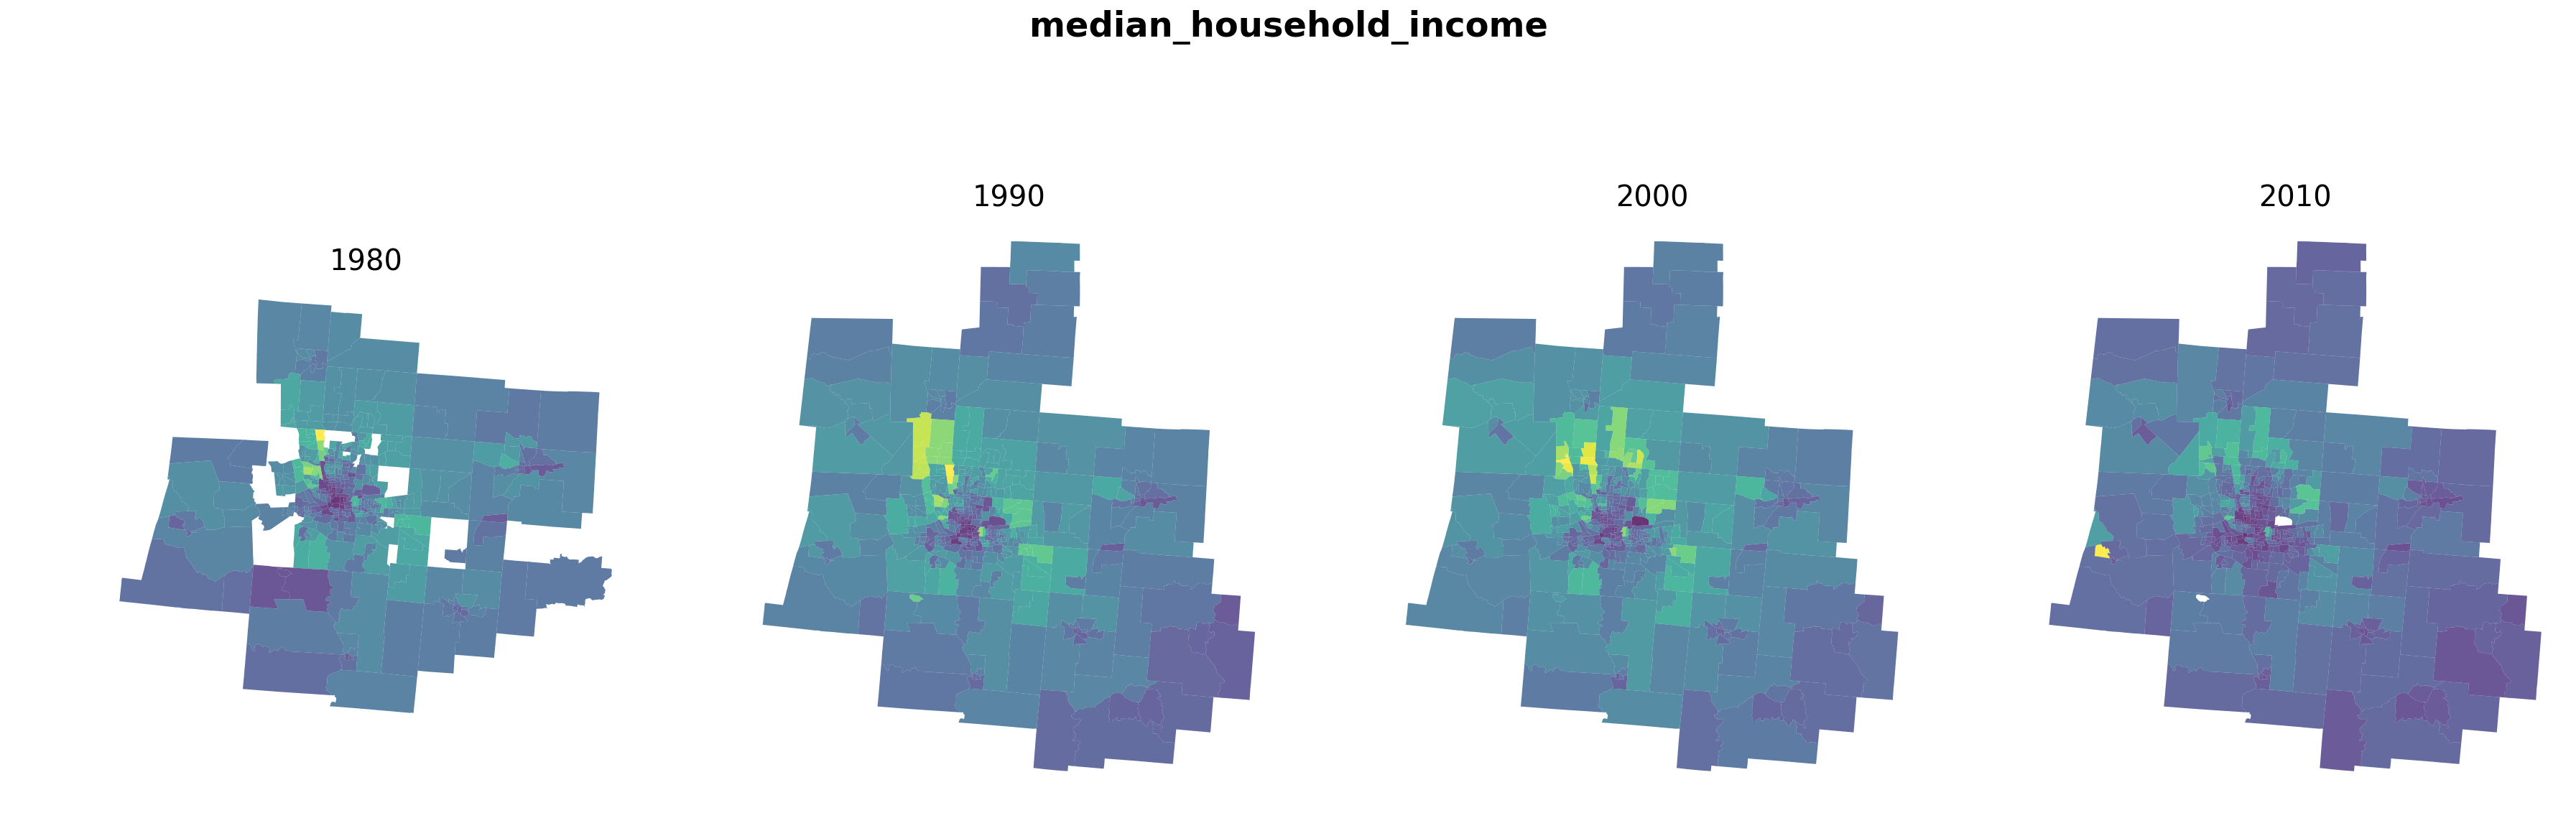

In [6]:
plot(clusters, 'median_household_income')

Since cluster labels are appended to the input database, it's also simple to compute and visualize statistics by cluster, even for variables that weren't used to derive the clusters

In [7]:
clusters.census.groupby('ward')['p_nonhisp_white_persons'].median()

ward
0    96.0
1    90.0
2    83.0
3    81.0
4    22.0
5    94.0
Name: p_nonhisp_white_persons, dtype: float64

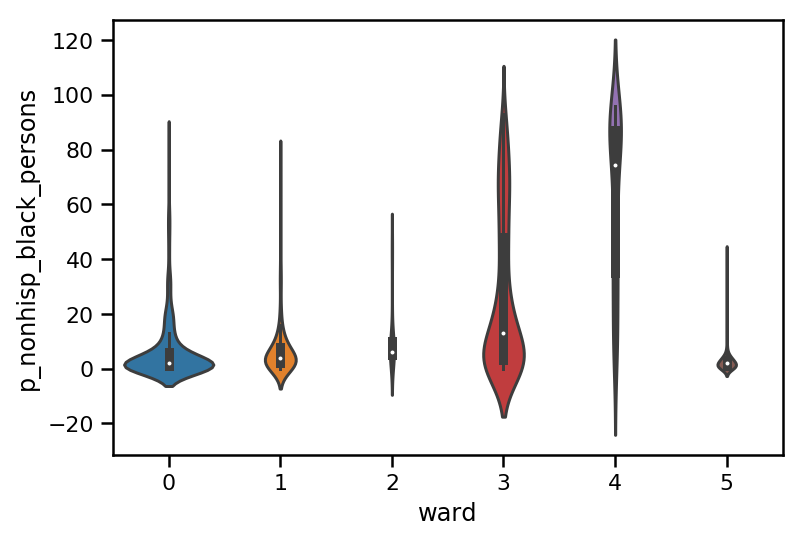

In [8]:
sns.violinplot(x="ward", y="p_nonhisp_black_persons", data=clusters.census, scale='count')

In [9]:
types = ['kmeans', 'ward', 'affinity_propagation', 'gaussian_mixture', 'spectral', 'hdbscan']

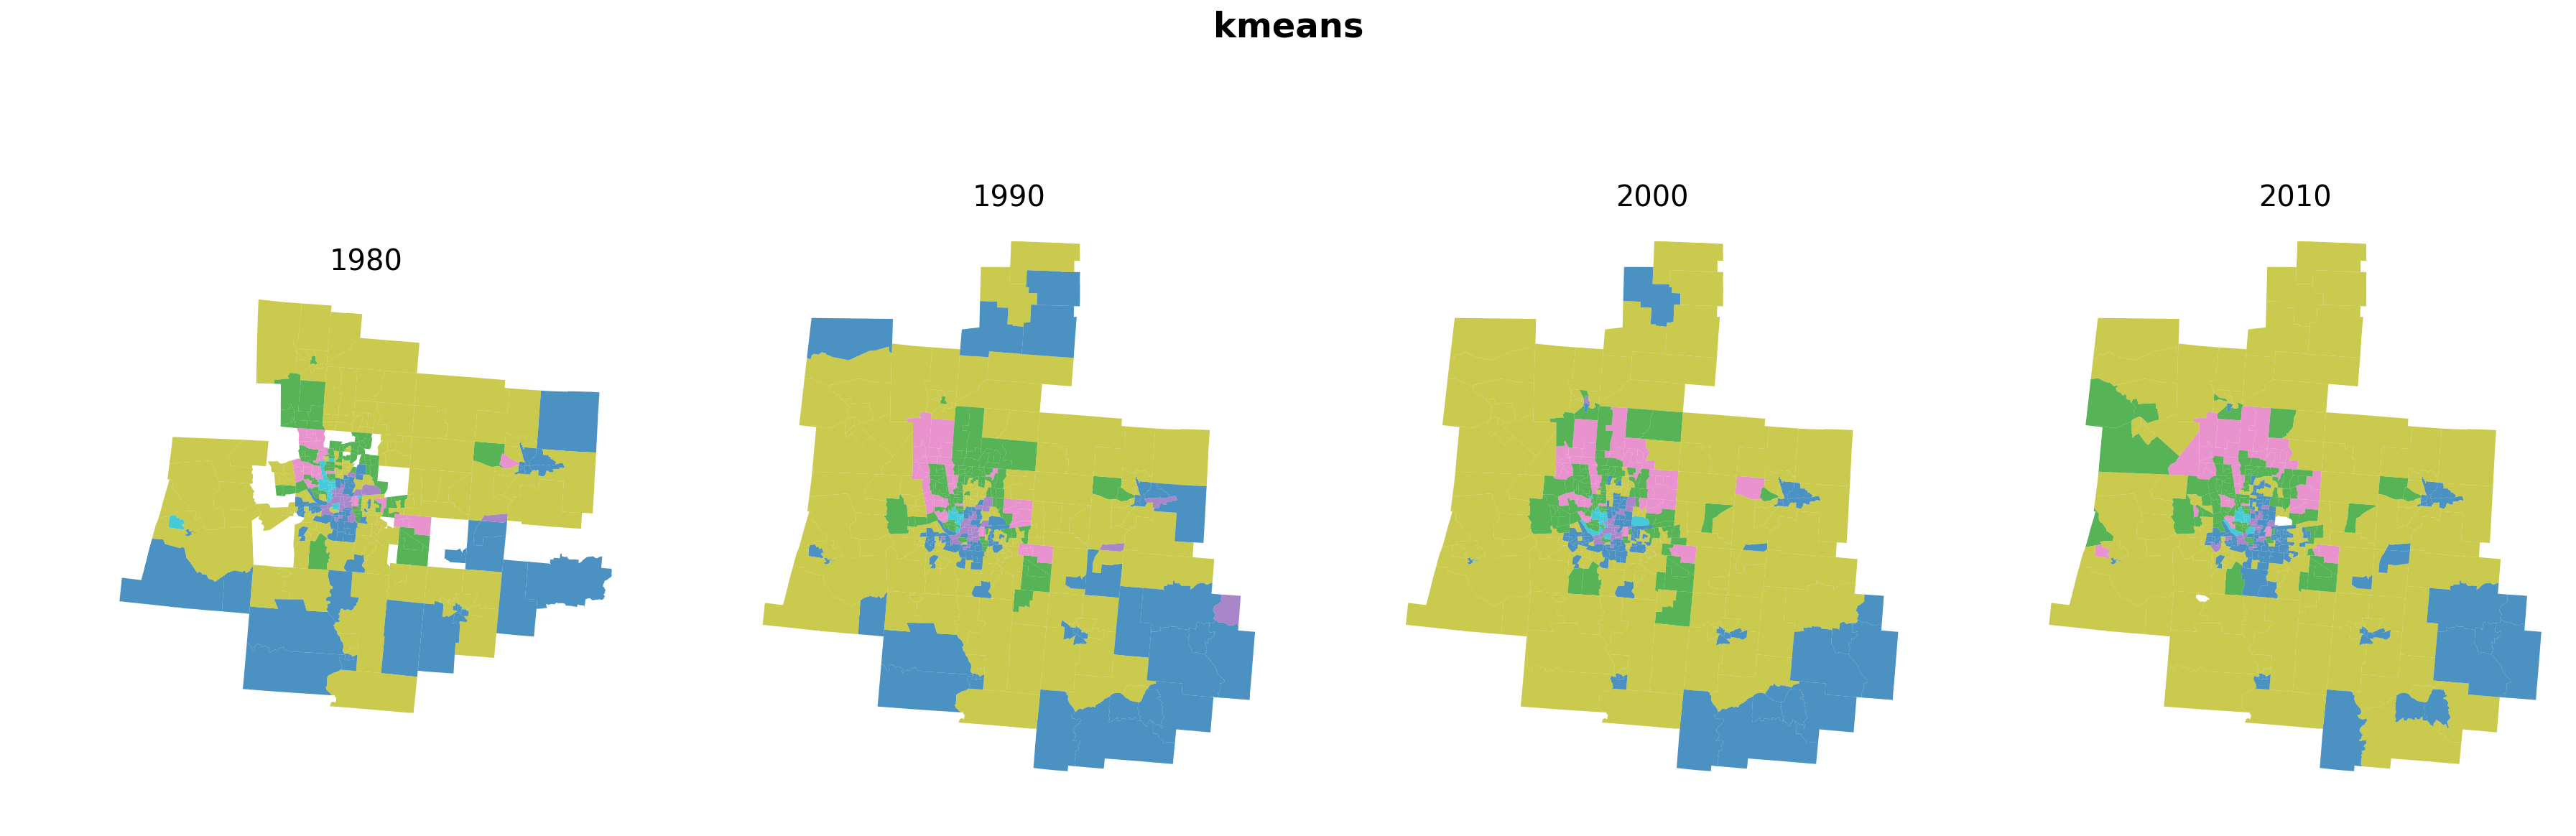

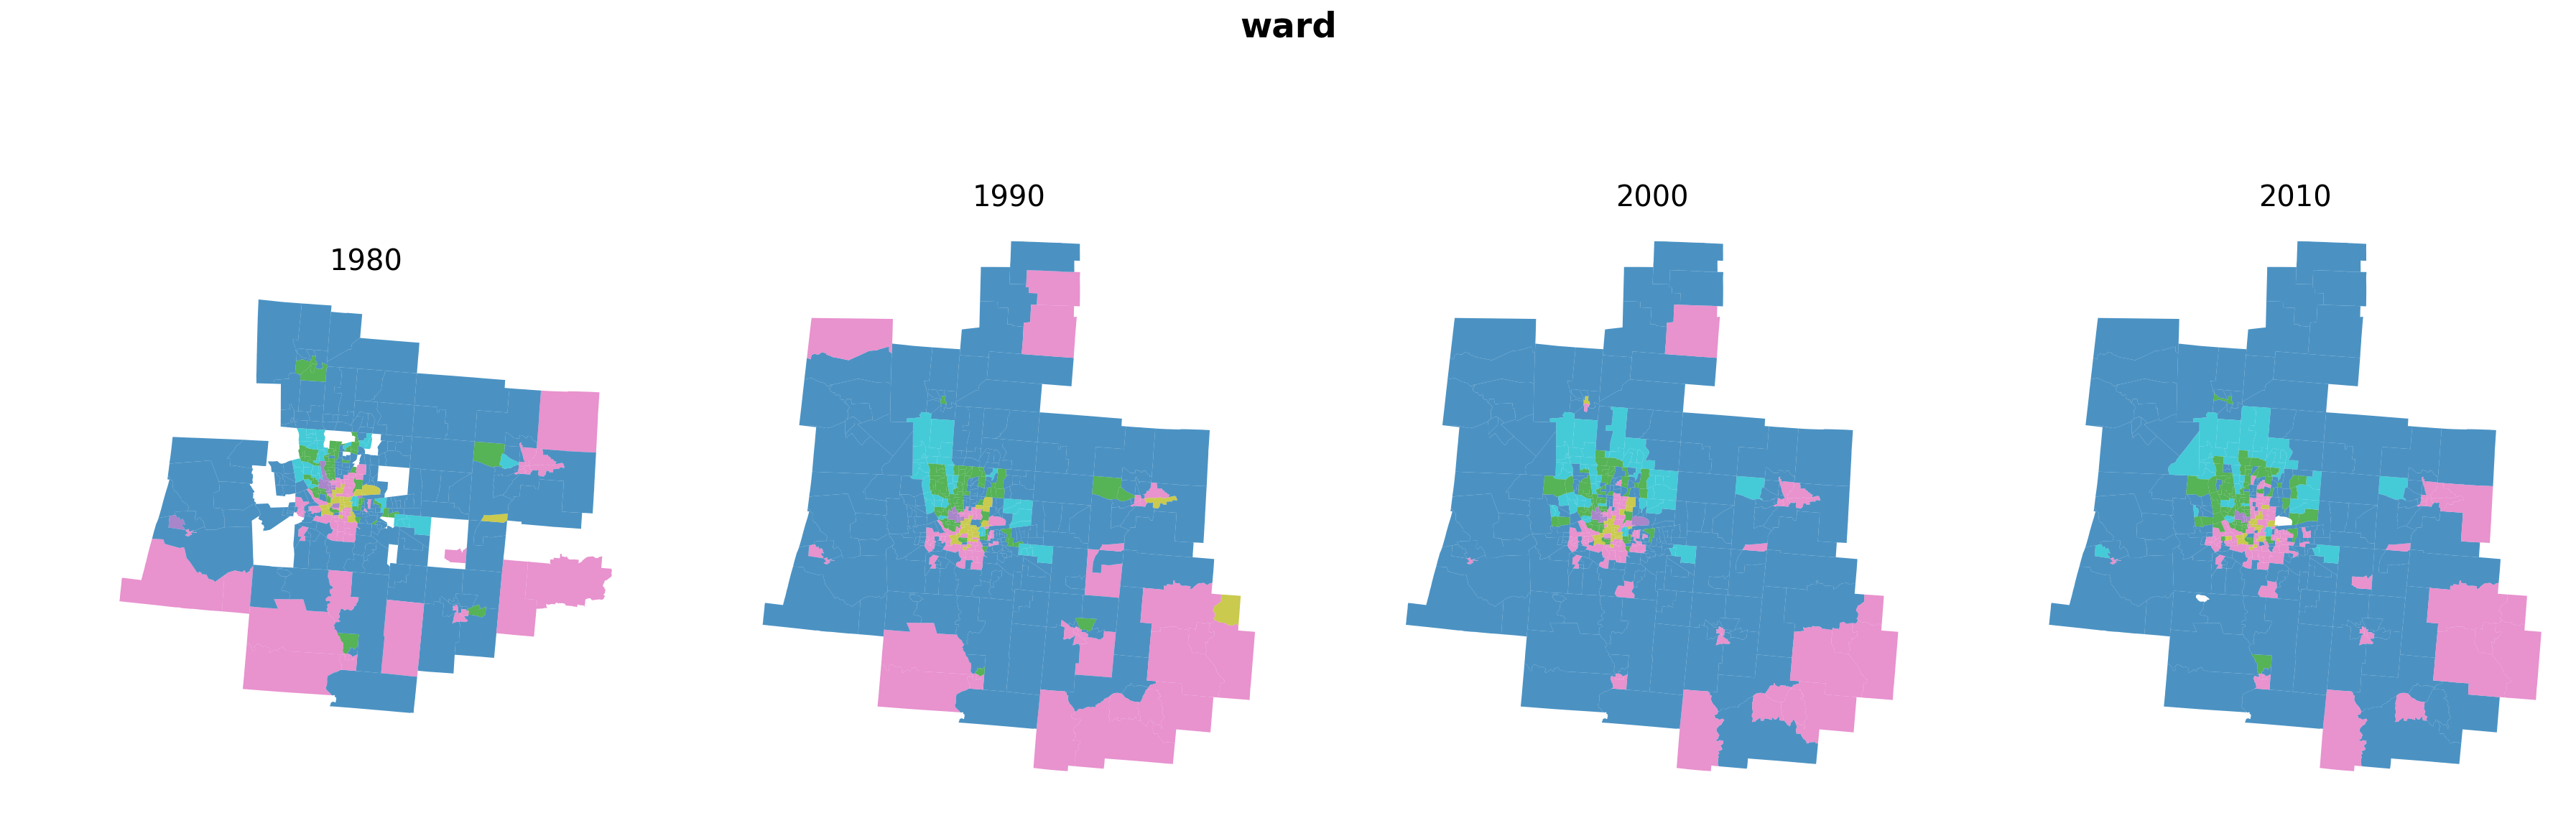

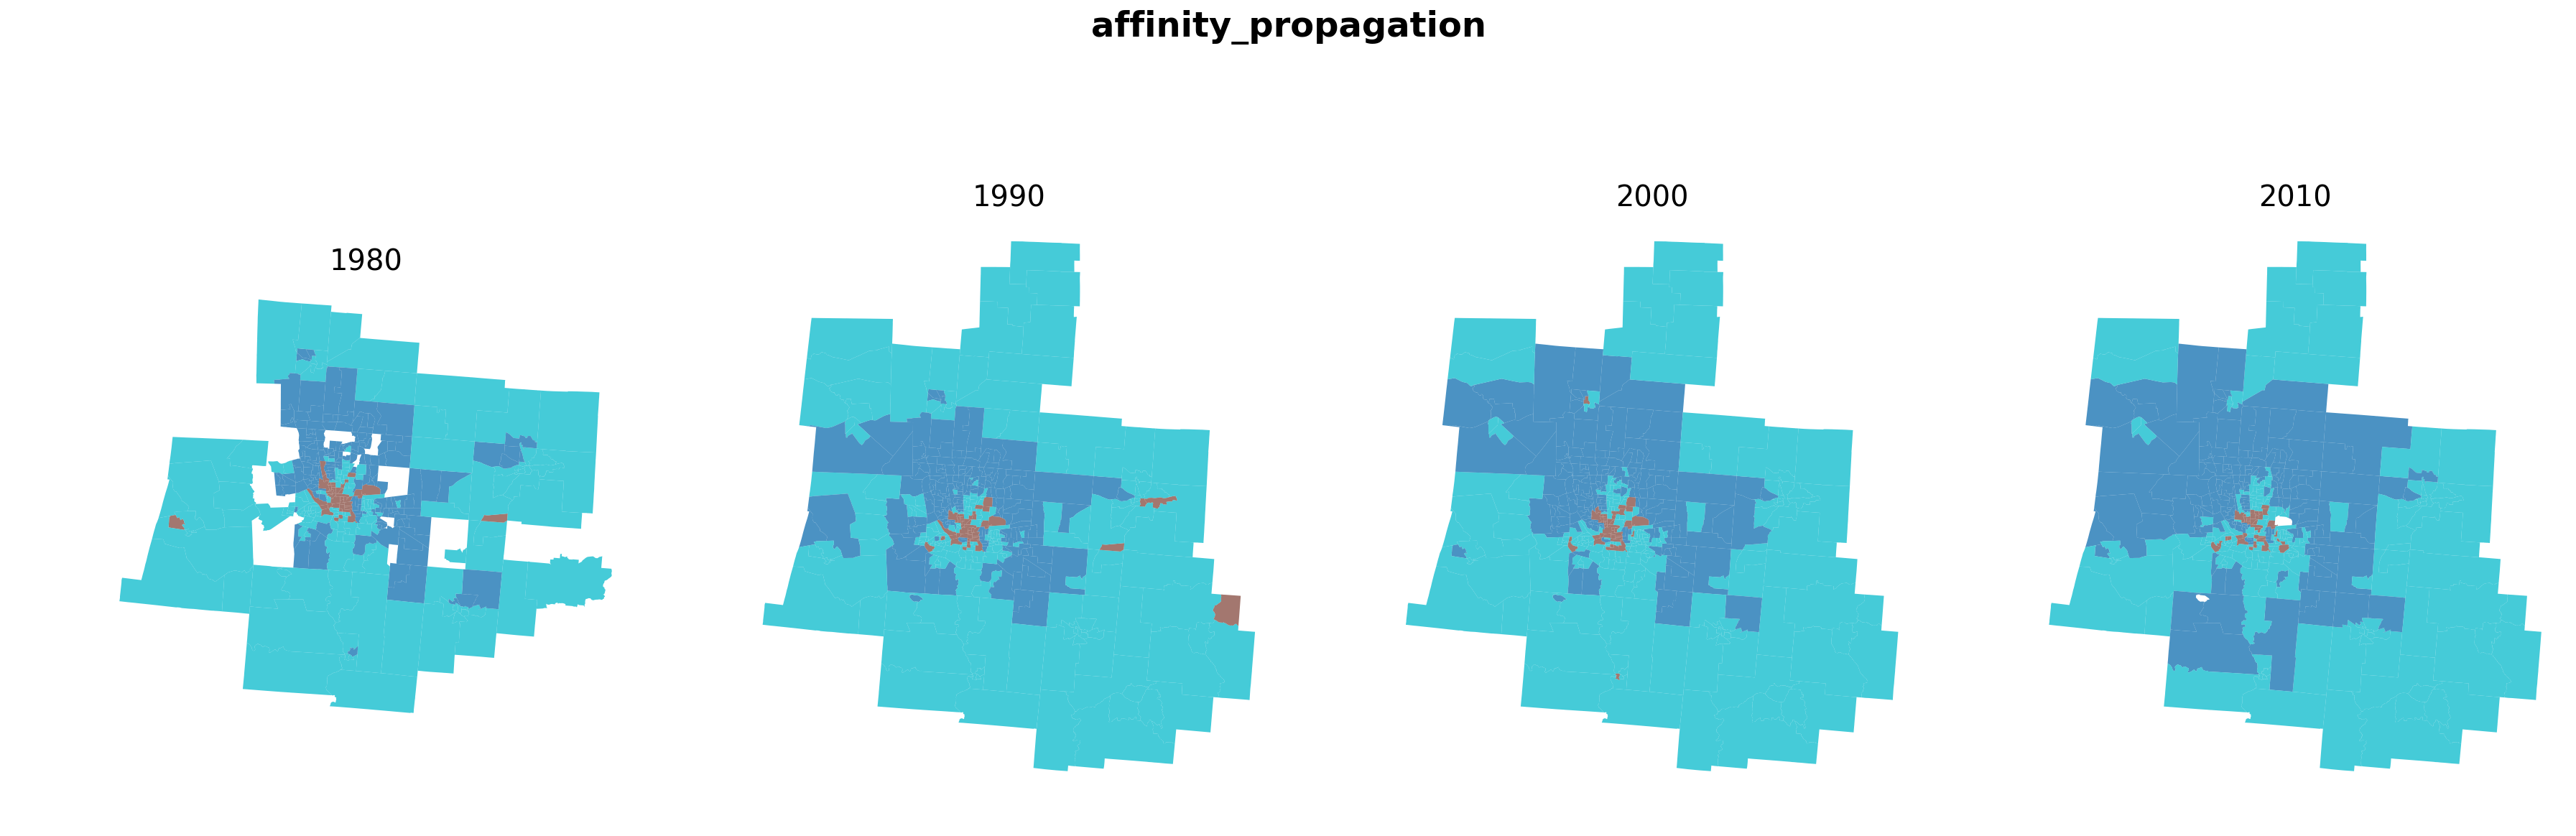

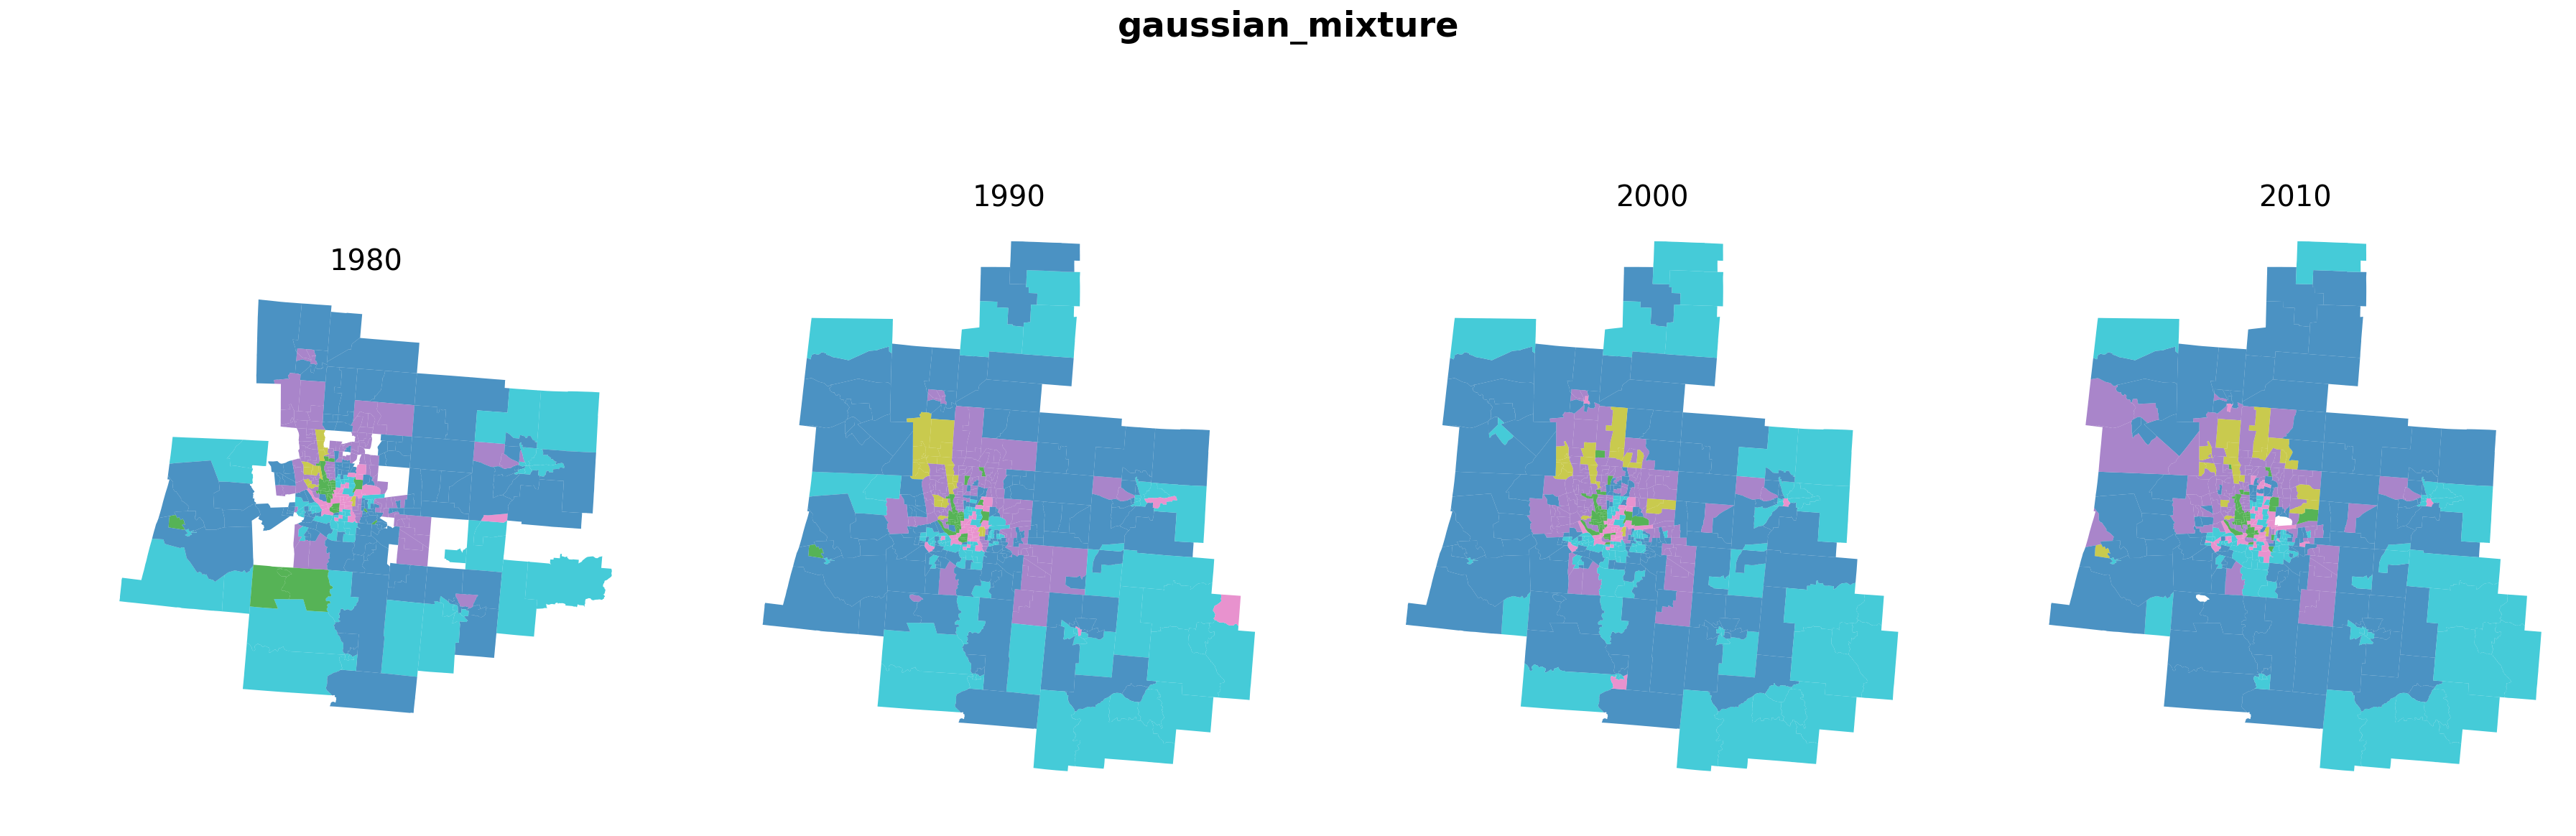

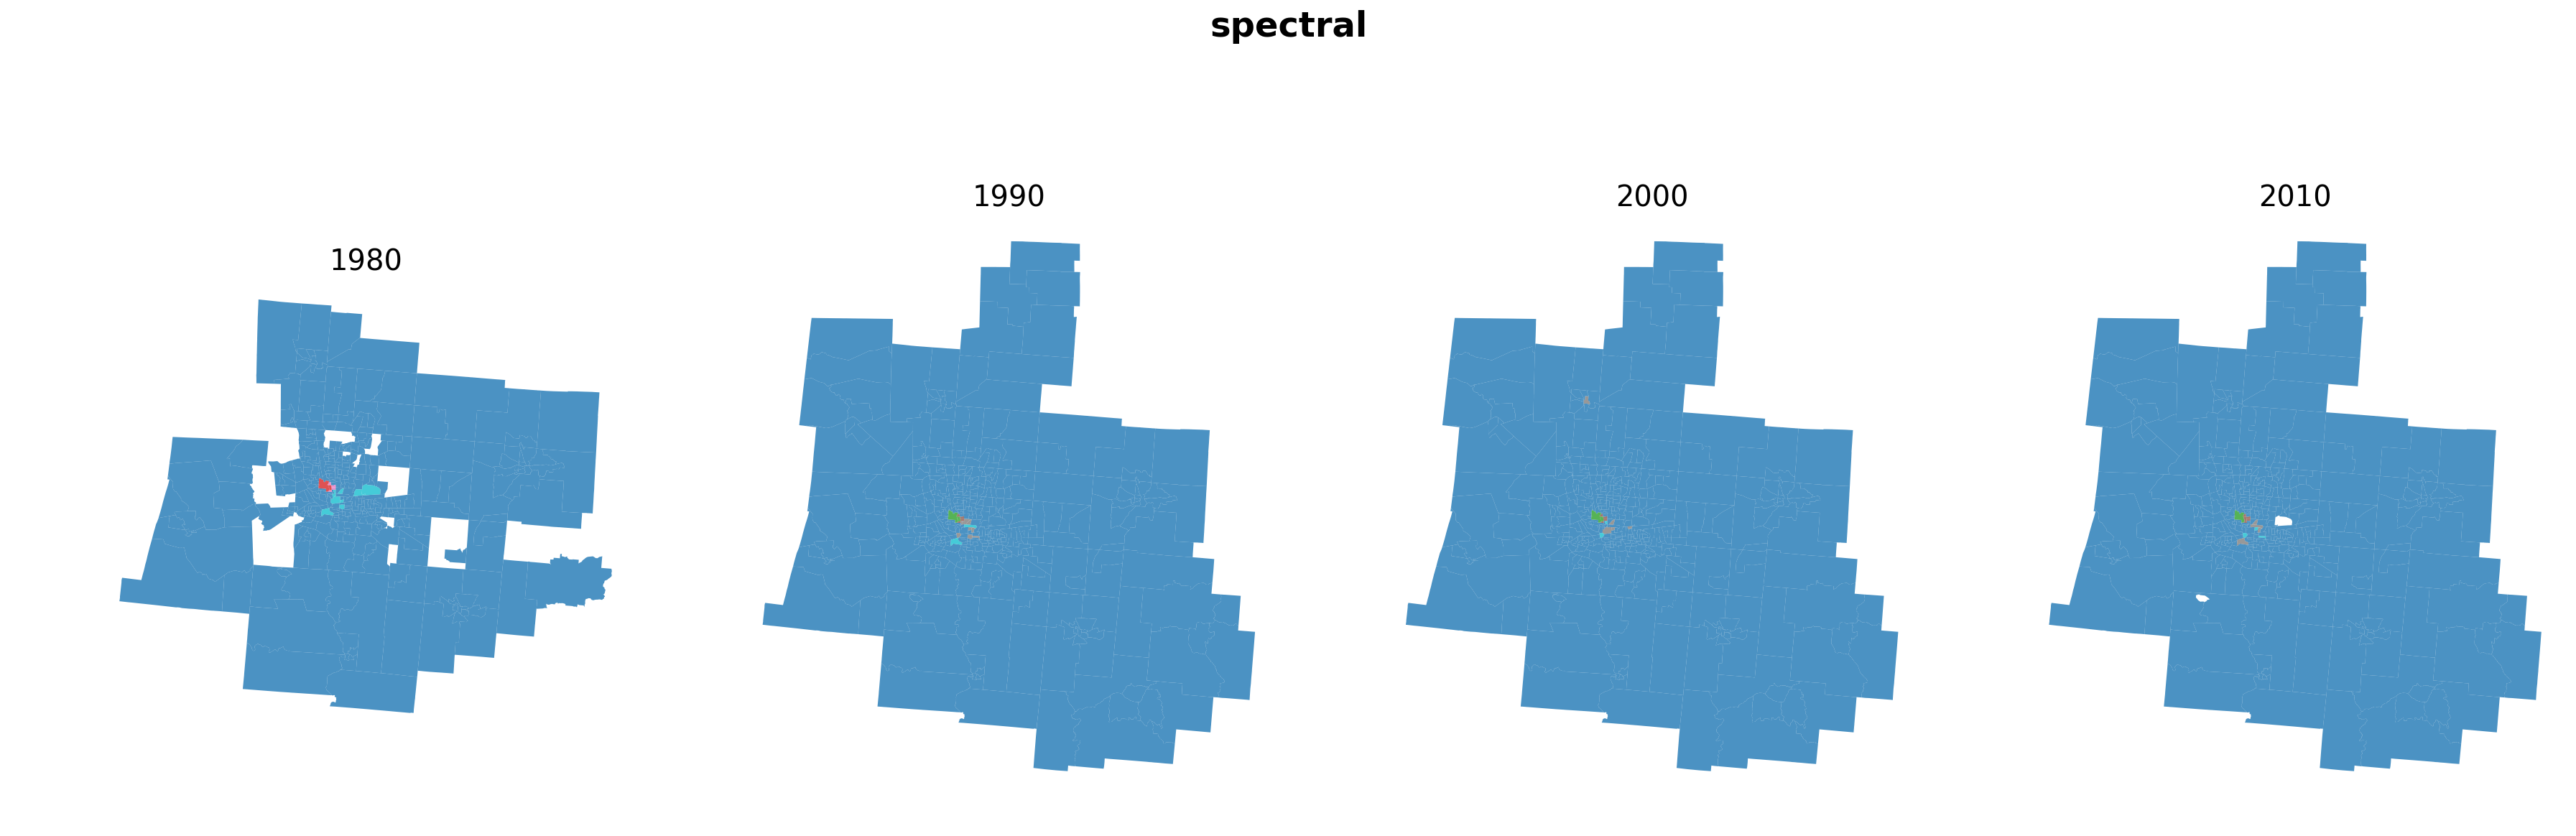

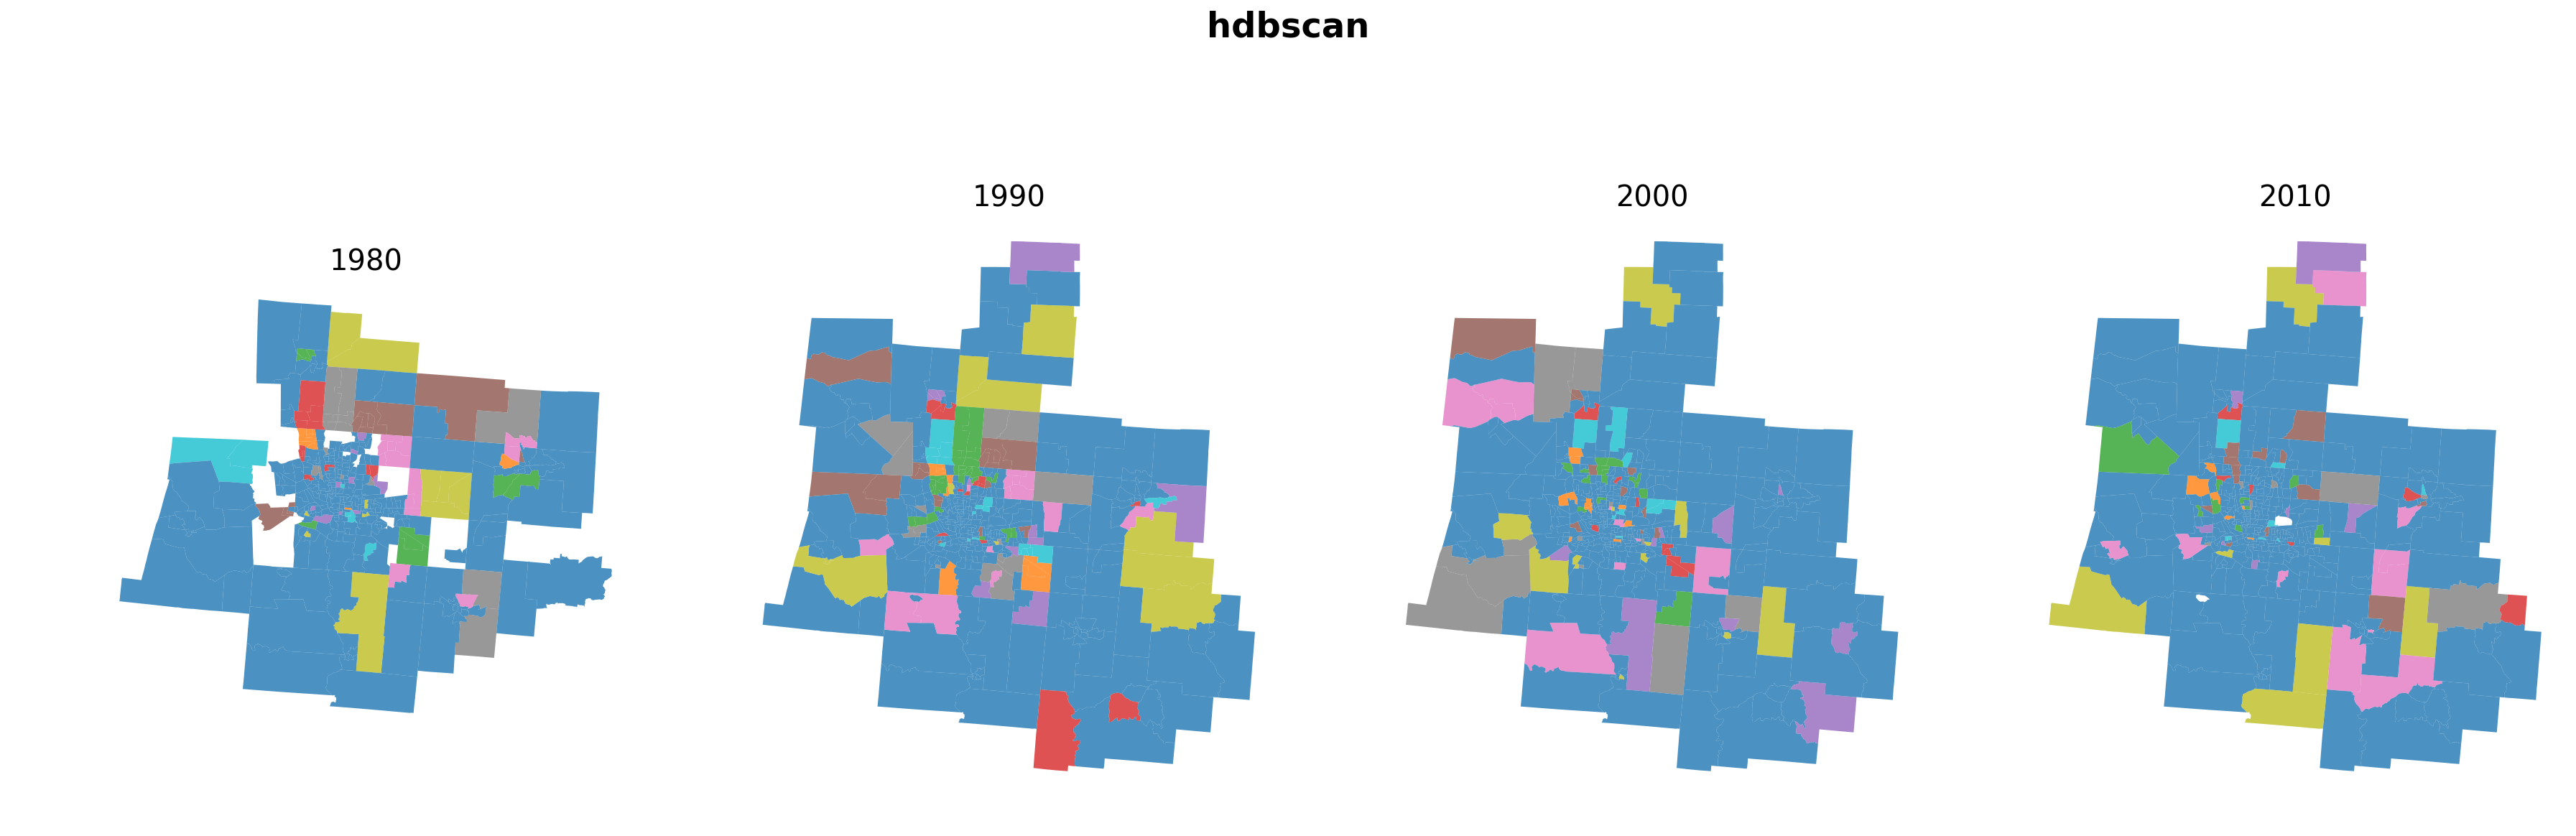

In [10]:
for algo in types:
    
    c = osnap.analyze.cluster(columbus, columns=['median_household_income', 'p_poverty_rate', 'p_edu_college_greater', 'p_unemployment_rate'], method=algo)
    plot(c, algo)

In [11]:
spatial_types = ['azp', 'ward_spatial', 'skater', 'spenc', 'max_p']

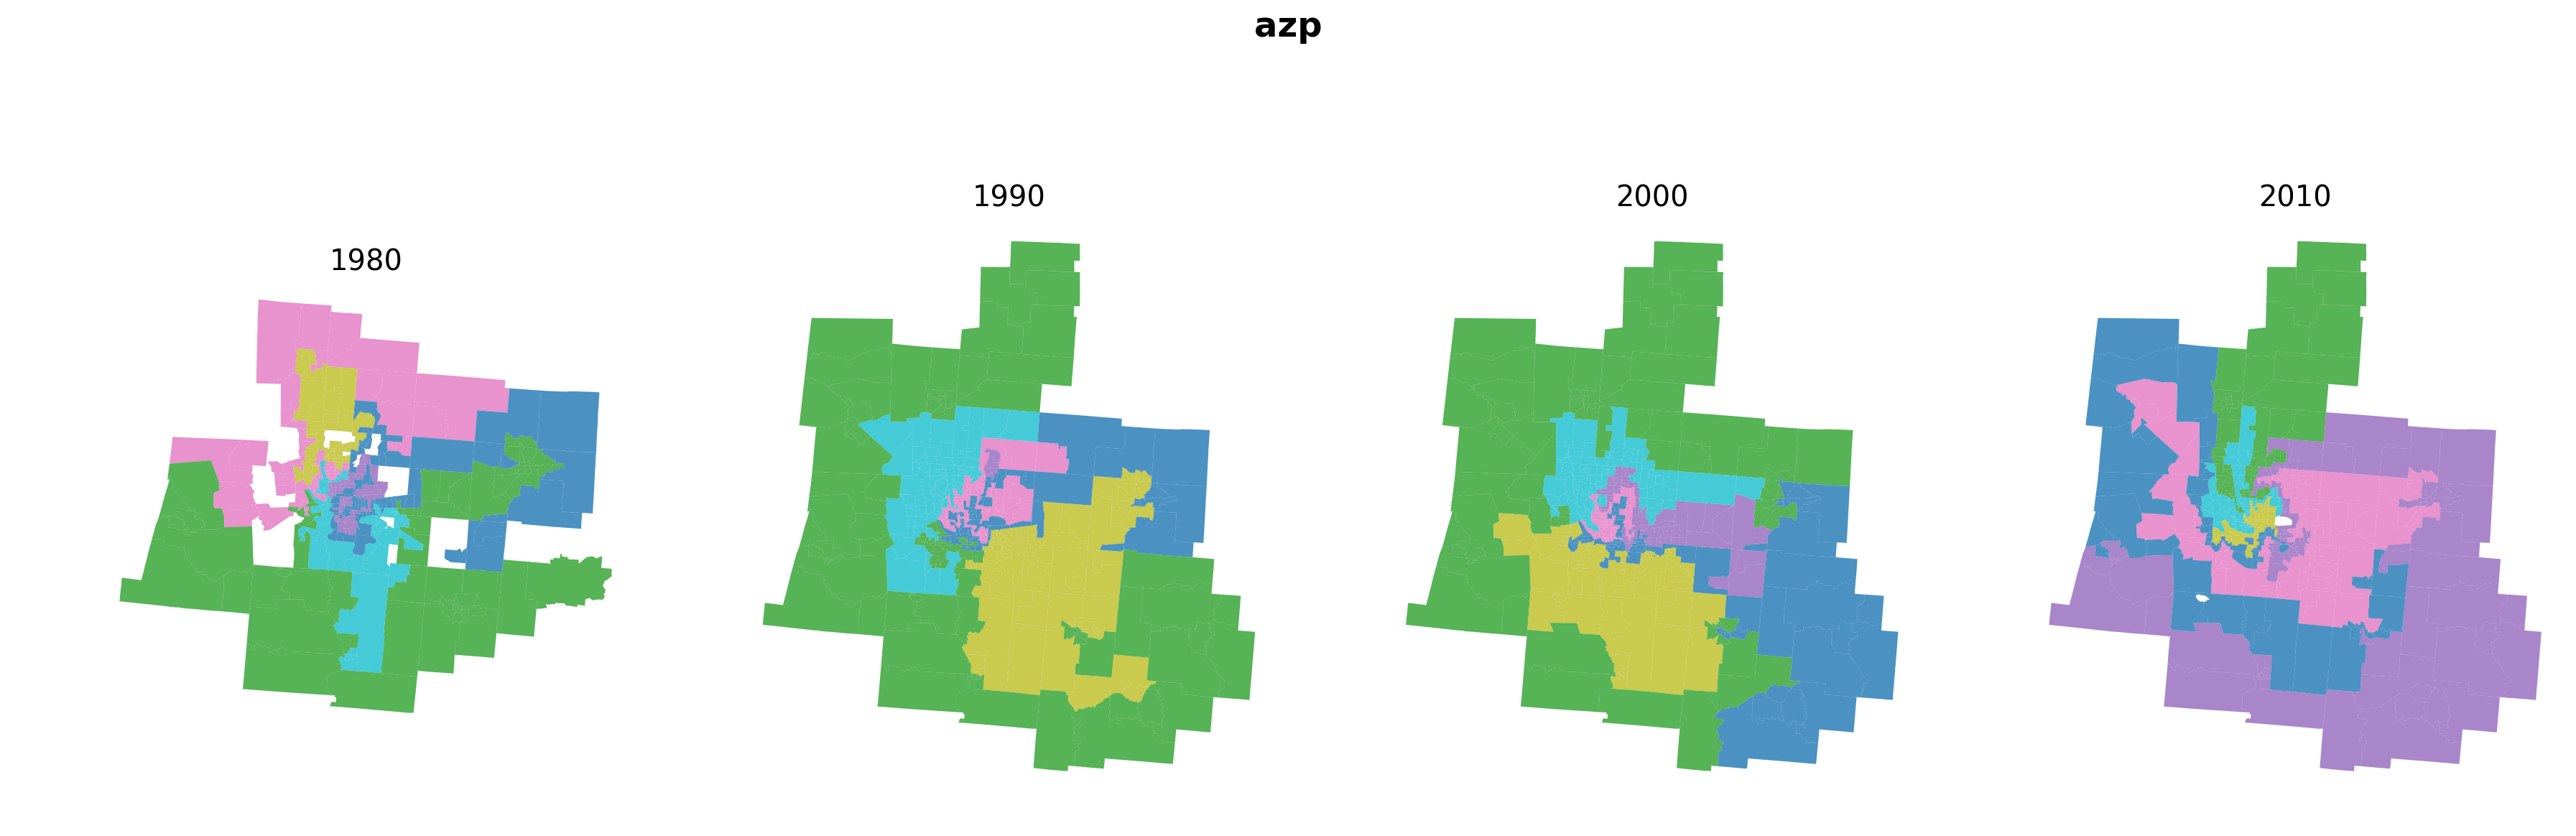

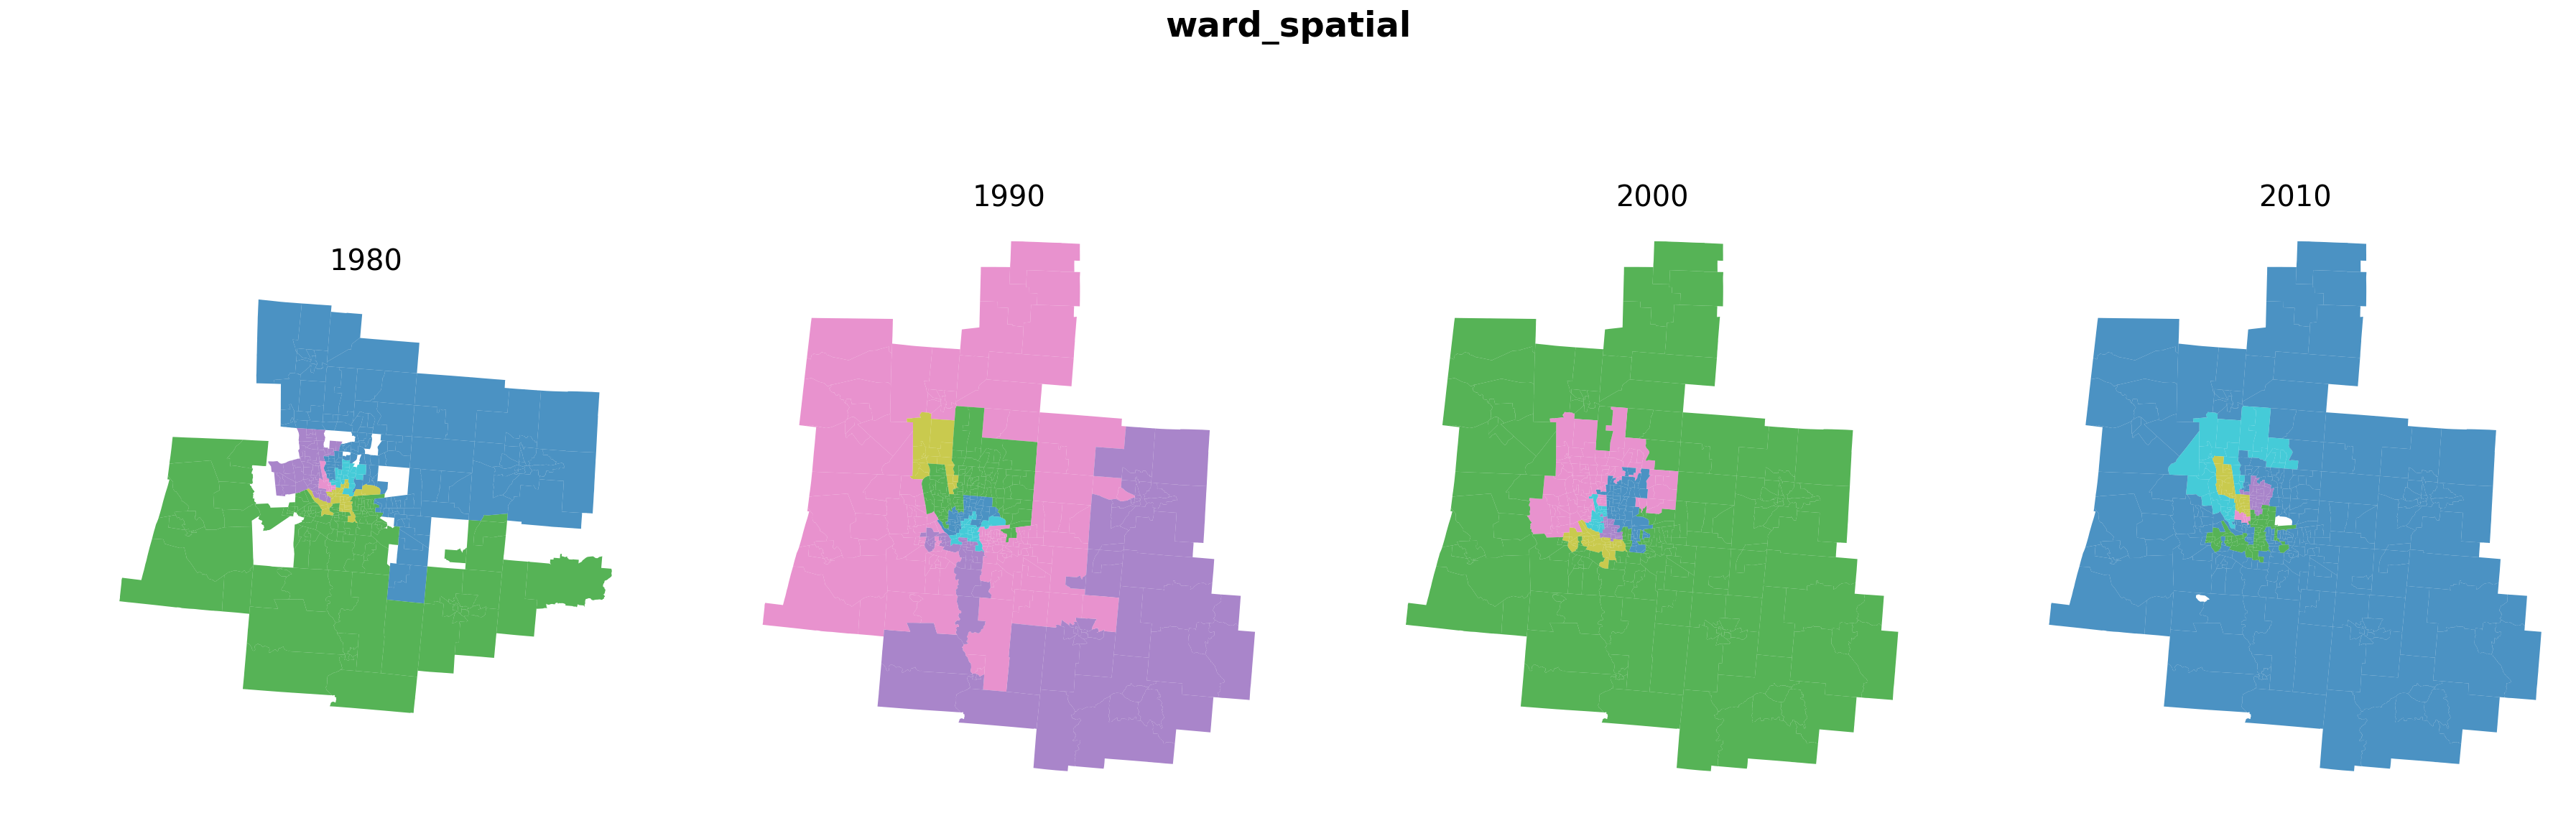

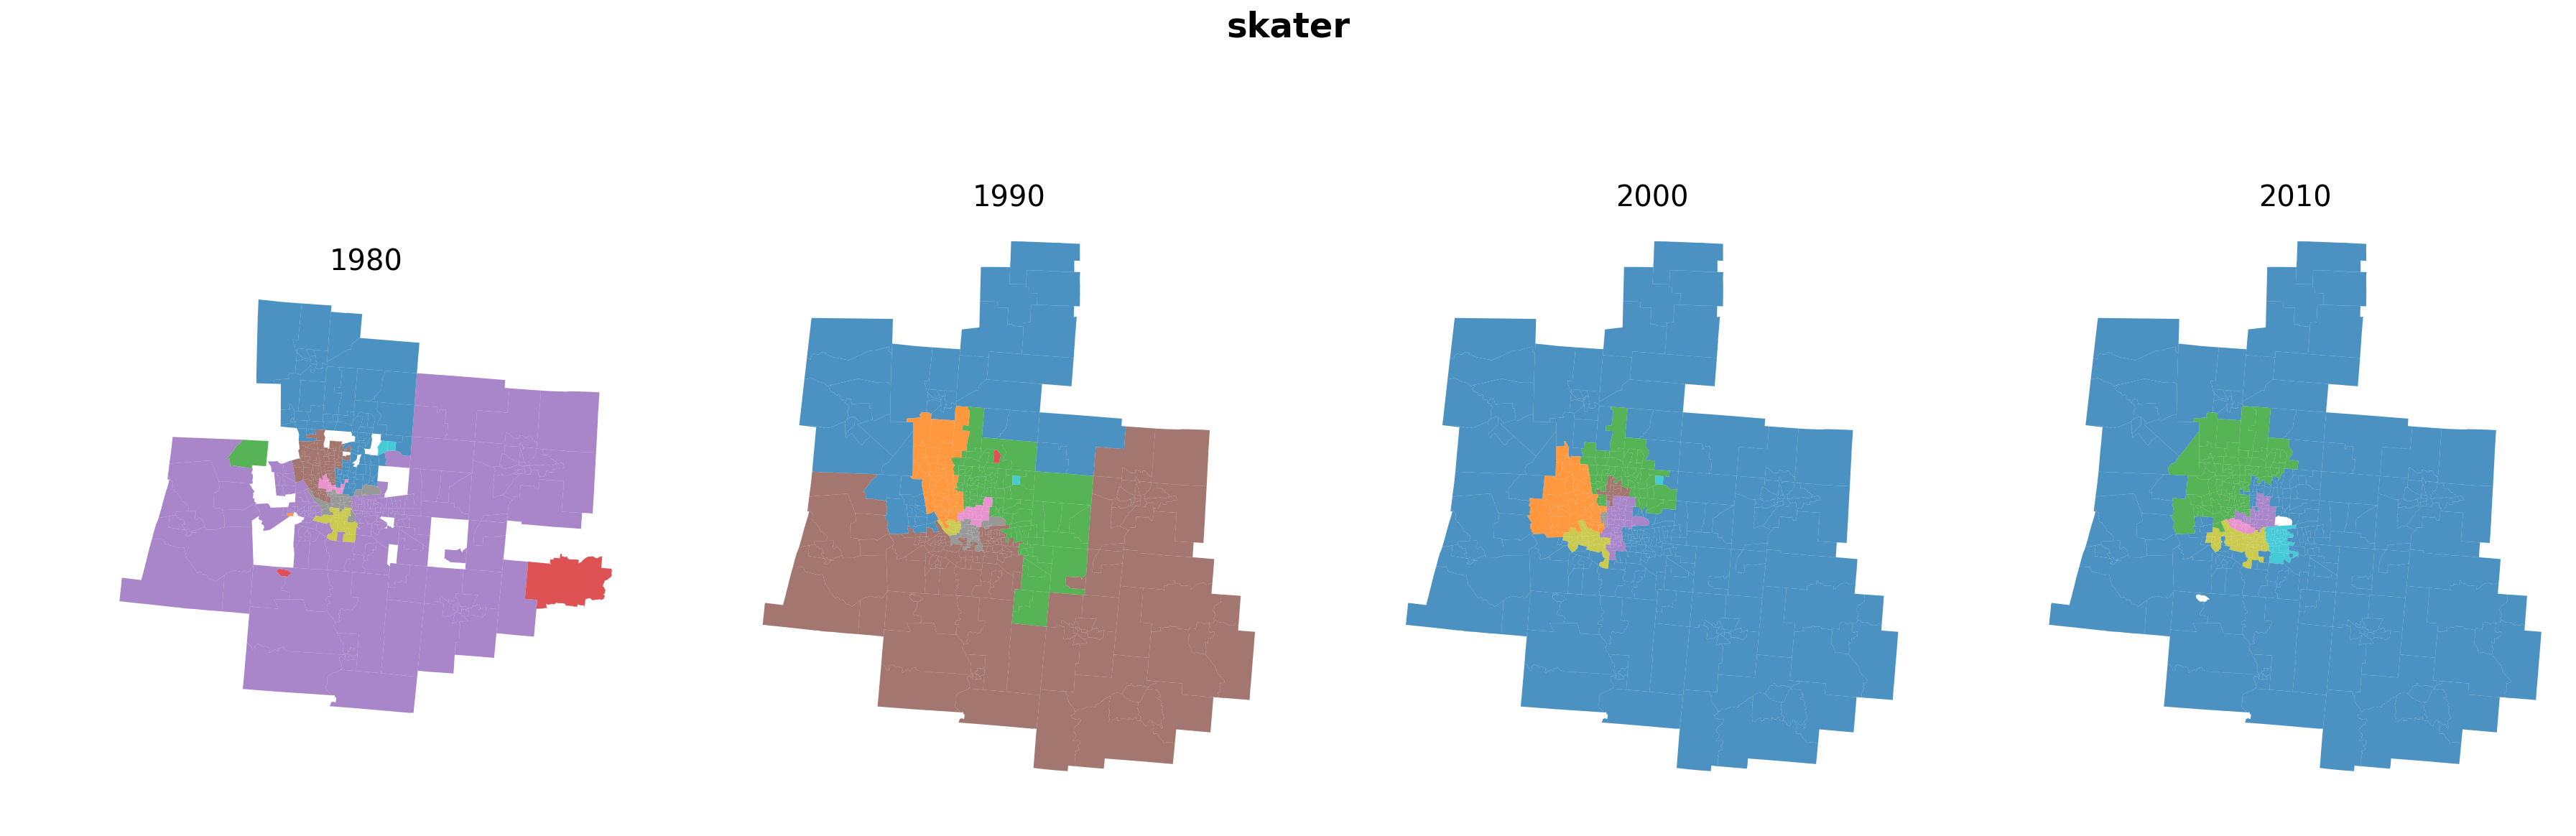

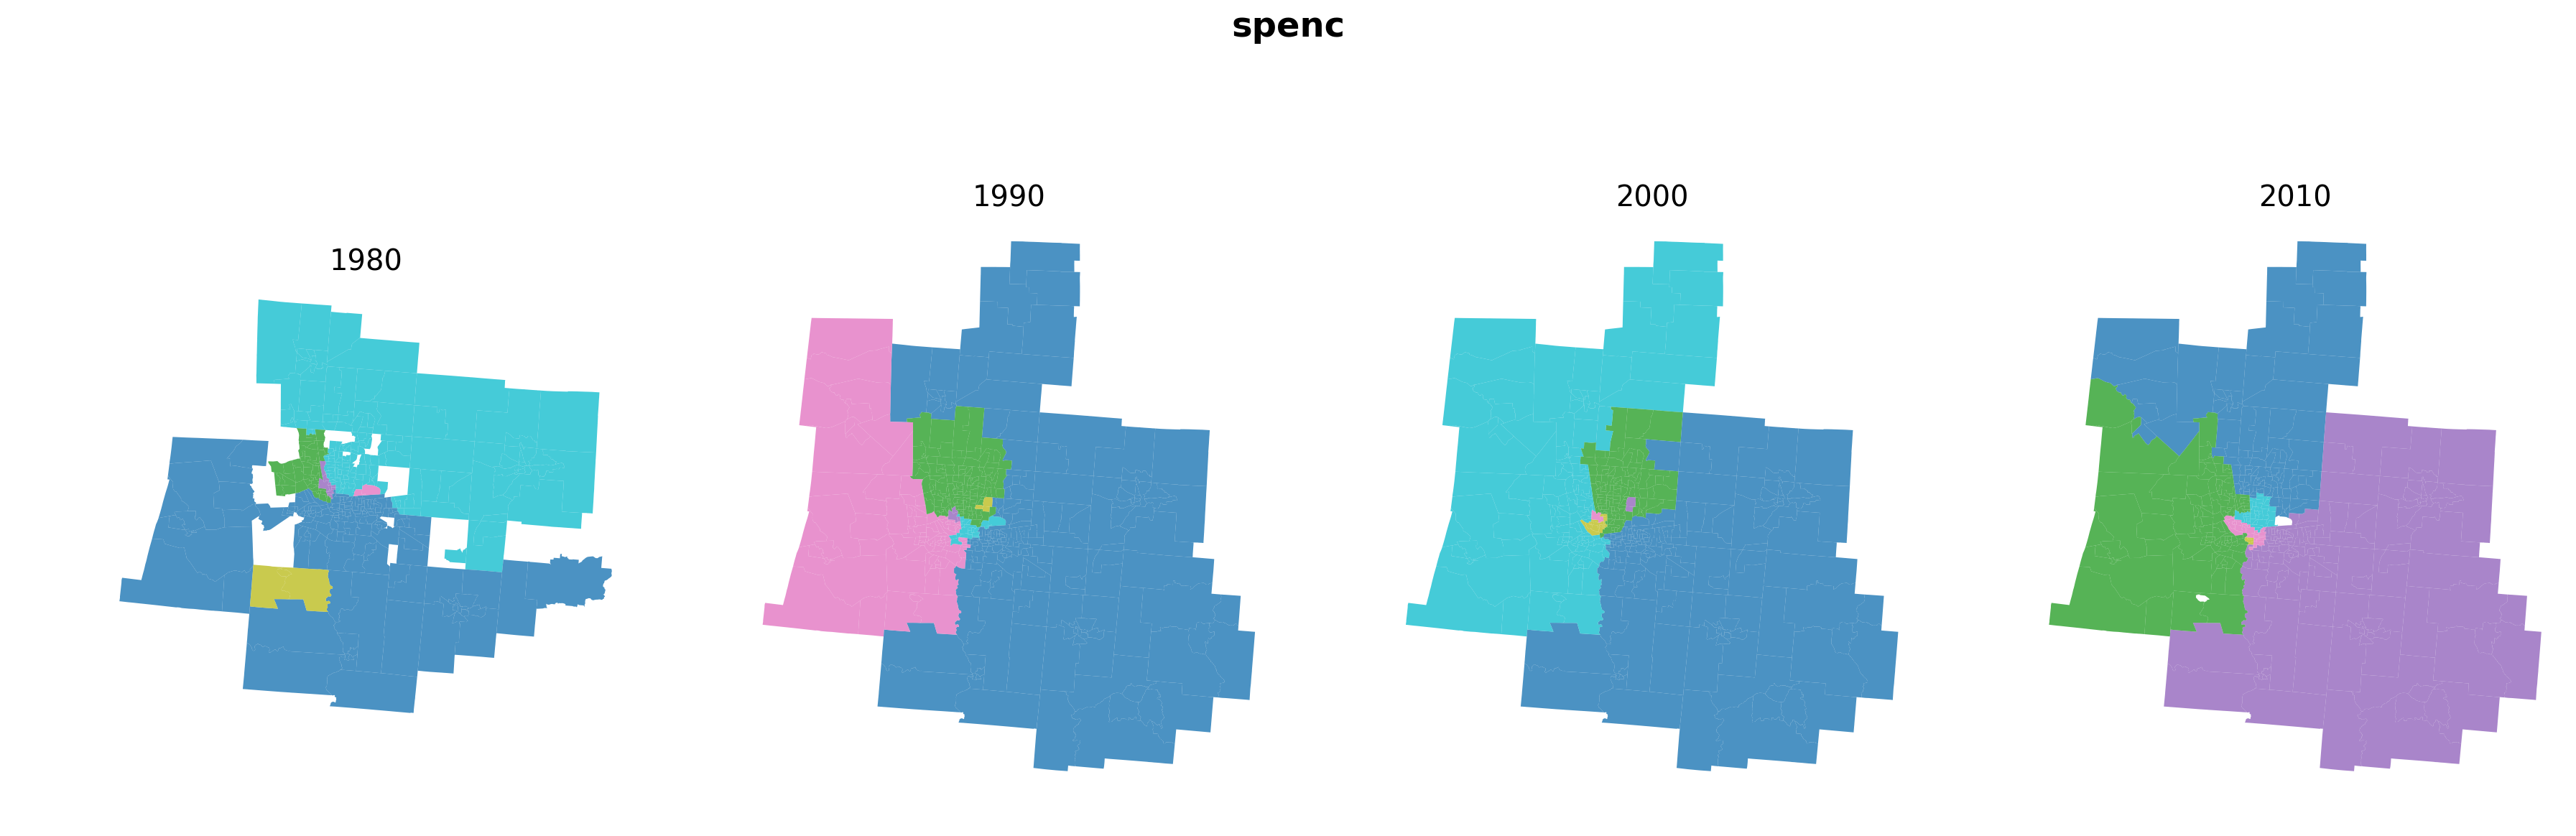

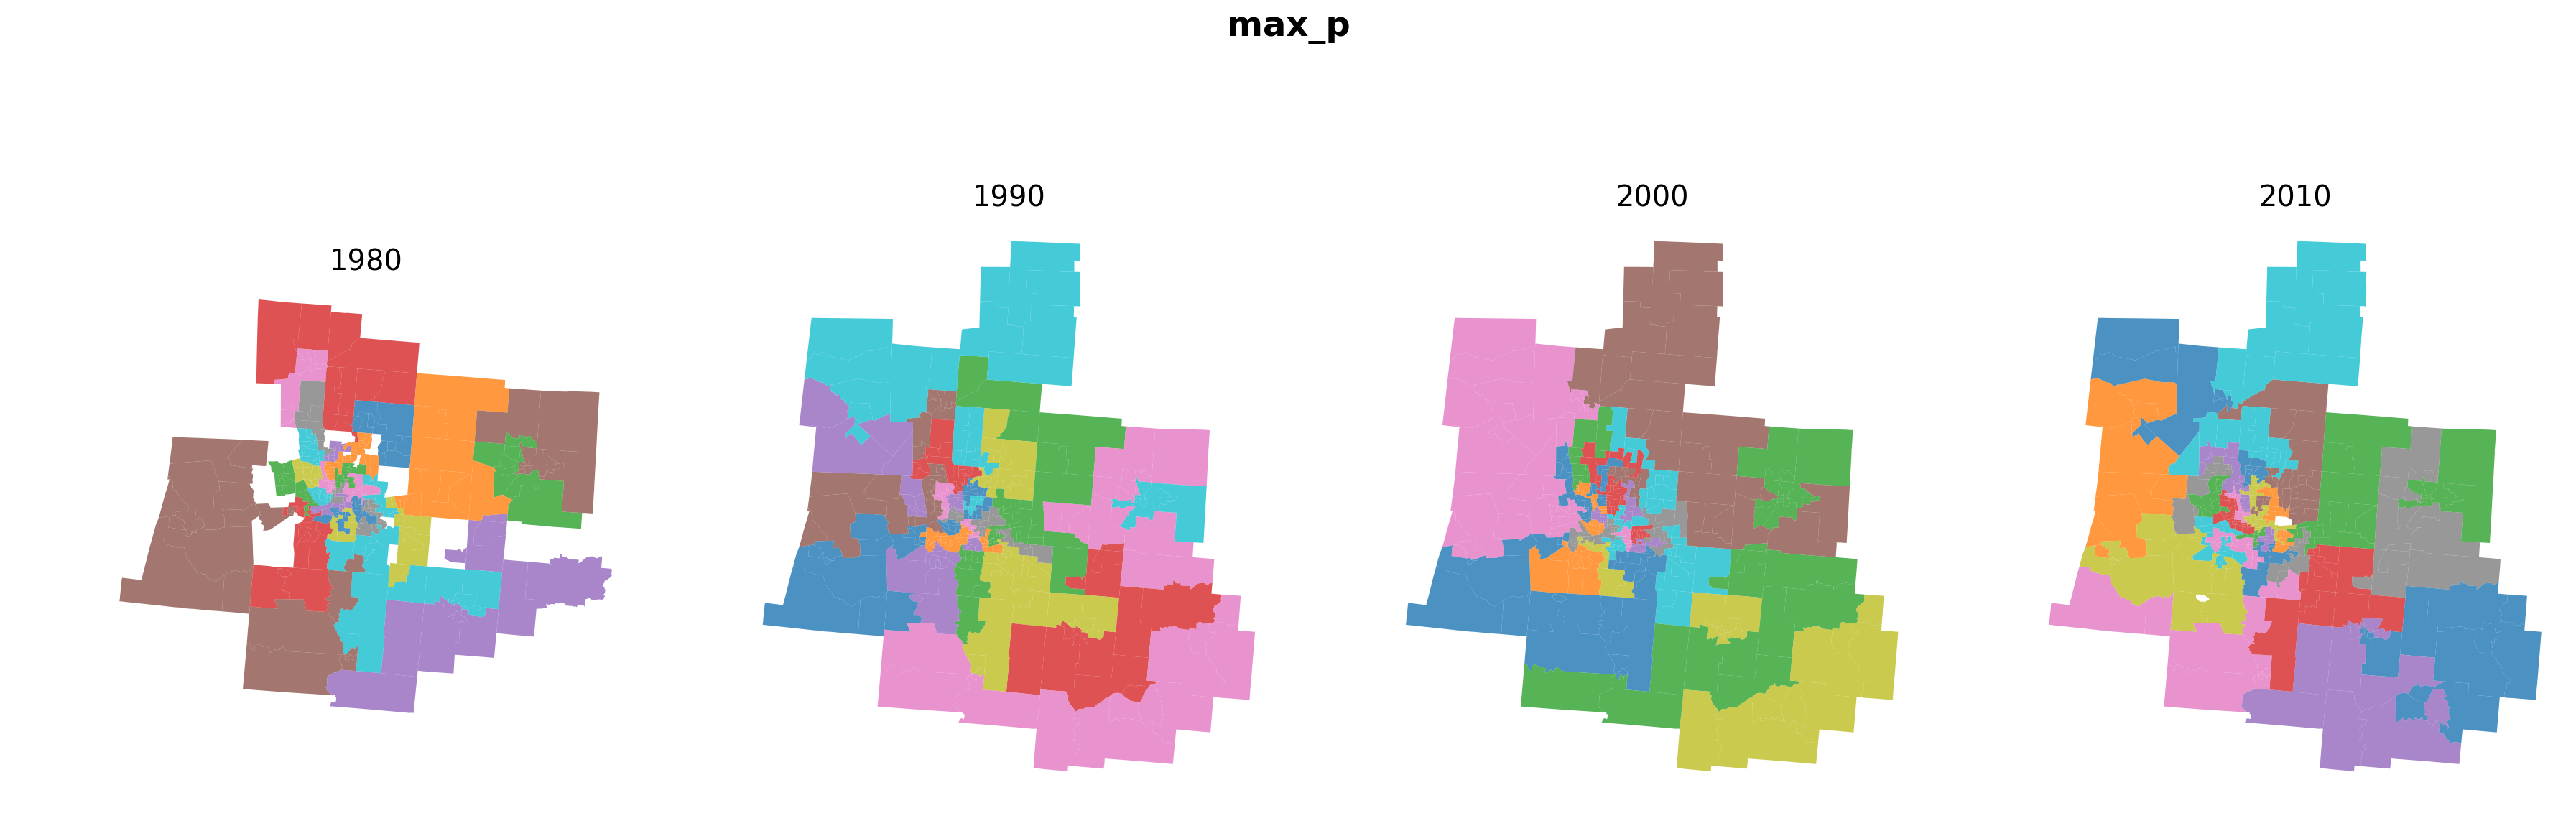

In [12]:
sys.stdout = open(os.devnull, 'w') # Disable printring because of max_p's diagnostics

for algo in spatial_types:
    
    c = osnap.analyze.cluster_spatial(columbus, columns=['median_household_income', 'p_poverty_rate', 'p_edu_college_greater', 'p_unemployment_rate'], method=algo)
    plot(c, algo)